In [1]:
#Importing required packages.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import datetime
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
#  Import and read the HR_Analytics.csv.
application_df = pd.read_csv("./DataFiles/HR_Analytics.csv")
final_results_all = []
application_df.head()

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,RM297,18,18-25,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,...,3,80,0,0,2,3,0,0,0,0.0
1,RM302,18,18-25,No,Travel_Rarely,812,Sales,10,3,Medical,...,1,80,0,0,2,3,0,0,0,0.0
2,RM458,18,18-25,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,...,4,80,0,0,3,3,0,0,0,0.0
3,RM728,18,18-25,No,Non-Travel,287,Research & Development,5,2,Life Sciences,...,4,80,0,0,2,3,0,0,0,0.0
4,RM829,18,18-25,Yes,Non-Travel,247,Research & Development,8,1,Medical,...,4,80,0,0,0,3,0,0,0,0.0


# Preprocessing: Remove Non-Beneficial Columns

In [3]:
# Create a dictionary with column names and their unique value counts
unique_counts = {col:application_df[col].nunique() for col in application_df.columns}

# Convert the dictionary to a DataFrame
unique_counts_df = pd.DataFrame(list(unique_counts.items()), columns=['Column Name', 'Unique Values'])

# Display the new DataFrame
print(unique_counts_df)

                 Column Name  Unique Values
0                      EmpID           1470
1                        Age             43
2                   AgeGroup              5
3                  Attrition              2
4             BusinessTravel              4
5                  DailyRate            886
6                 Department              3
7           DistanceFromHome             29
8                  Education              5
9             EducationField              6
10             EmployeeCount              1
11            EmployeeNumber           1470
12   EnvironmentSatisfaction              4
13                    Gender              2
14                HourlyRate             71
15            JobInvolvement              4
16                  JobLevel              5
17                   JobRole              9
18           JobSatisfaction              4
19             MaritalStatus              3
20             MonthlyIncome           1349
21                SalarySlab    

In [4]:
#make a copy of dataframe
a1pplication_df = application_df.copy()

print(a1pplication_df.shape)

(1480, 38)


In [5]:
# Identify columns with only one unique value
cols_to_drop = [col for col in a1pplication_df.columns if a1pplication_df[col].nunique() == 1]

# Drop these columns from the DataFrame
a1pplication_df.drop(cols_to_drop, axis=1, inplace=True)
a1pplication_df.shape

(1480, 35)

In [6]:
# Remove id column
a1pplication_df.drop(['EmpID'], axis=1, inplace=True)
a1pplication_df.shape

(1480, 34)

# Preprocessing: Convert 2 valued columns to '1's and '0's

In [7]:
#Check to see if only 2 choices for 'Attrition' column
a1pplication_df['Attrition'].unique()

array(['Yes', 'No'], dtype=object)

In [8]:
#Make another copy of df
a2pplication_df = a1pplication_df.copy()
print(a2pplication_df.shape)
print(a2pplication_df.info())
a2pplication_df.head()

(1480, 34)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1480 non-null   int64  
 1   AgeGroup                  1480 non-null   object 
 2   Attrition                 1480 non-null   object 
 3   BusinessTravel            1480 non-null   object 
 4   DailyRate                 1480 non-null   int64  
 5   Department                1480 non-null   object 
 6   DistanceFromHome          1480 non-null   int64  
 7   Education                 1480 non-null   int64  
 8   EducationField            1480 non-null   object 
 9   EmployeeNumber            1480 non-null   int64  
 10  EnvironmentSatisfaction   1480 non-null   int64  
 11  Gender                    1480 non-null   object 
 12  HourlyRate                1480 non-null   int64  
 13  JobInvolvement            1480 non-null   int64  
 1

,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,18,18-25,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,405,...,3,3,0,0,2,3,0,0,0,0.0
1,18,18-25,No,Travel_Rarely,812,Sales,10,3,Medical,411,...,3,1,0,0,2,3,0,0,0,0.0
2,18,18-25,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,614,...,3,4,0,0,3,3,0,0,0,0.0
3,18,18-25,No,Non-Travel,287,Research & Development,5,2,Life Sciences,1012,...,3,4,0,0,2,3,0,0,0,0.0
4,18,18-25,Yes,Non-Travel,247,Research & Development,8,1,Medical,1156,...,3,4,0,0,0,3,0,0,0,0.0


In [9]:
#Set 'Attrition' column to binary
a2pplication_df['Attrition'] = a2pplication_df['Attrition'].replace('No',"0")
a2pplication_df['Attrition'] = a2pplication_df['Attrition'].replace('Yes',"1")
a2pplication_df['Attrition'] = a2pplication_df['Attrition'].astype('int64')
print(a2pplication_df.shape)
print(a2pplication_df.info())
a2pplication_df.head()

(1480, 34)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1480 non-null   int64  
 1   AgeGroup                  1480 non-null   object 
 2   Attrition                 1480 non-null   int64  
 3   BusinessTravel            1480 non-null   object 
 4   DailyRate                 1480 non-null   int64  
 5   Department                1480 non-null   object 
 6   DistanceFromHome          1480 non-null   int64  
 7   Education                 1480 non-null   int64  
 8   EducationField            1480 non-null   object 
 9   EmployeeNumber            1480 non-null   int64  
 10  EnvironmentSatisfaction   1480 non-null   int64  
 11  Gender                    1480 non-null   object 
 12  HourlyRate                1480 non-null   int64  
 13  JobInvolvement            1480 non-null   int64  
 1

,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,18,18-25,1,Travel_Rarely,230,Research & Development,3,3,Life Sciences,405,...,3,3,0,0,2,3,0,0,0,0.0
1,18,18-25,0,Travel_Rarely,812,Sales,10,3,Medical,411,...,3,1,0,0,2,3,0,0,0,0.0
2,18,18-25,1,Travel_Frequently,1306,Sales,5,3,Marketing,614,...,3,4,0,0,3,3,0,0,0,0.0
3,18,18-25,0,Non-Travel,287,Research & Development,5,2,Life Sciences,1012,...,3,4,0,0,2,3,0,0,0,0.0
4,18,18-25,1,Non-Travel,247,Research & Development,8,1,Medical,1156,...,3,4,0,0,0,3,0,0,0,0.0


In [10]:
#Convert Categorical data to numeric with 'pd.get_dummies'
dummies = pd.get_dummies(a2pplication_df)
print(dummies.shape)
dummies.head()

(1480, 63)


,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,SalarySlab_10k-15k,SalarySlab_15k+,SalarySlab_5k-10k,SalarySlab_Upto 5k,OverTime_No,OverTime_Yes
0,18,1,230,3,3,405,3,54,3,1,...,0,0,0,1,0,0,0,1,1,0
1,18,0,812,10,3,411,4,69,2,1,...,1,0,0,1,0,0,0,1,1,0
2,18,1,1306,5,3,614,2,69,3,1,...,1,0,0,1,0,0,0,1,0,1
3,18,0,287,5,2,1012,2,73,3,1,...,0,0,0,1,0,0,0,1,1,0
4,18,1,247,8,1,1156,3,80,3,1,...,0,0,0,1,0,0,0,1,1,0


In [11]:
#Replace all NaaN values with 0
dummies.fillna(0, inplace=True)
print(dummies.shape)
dummies.head()

(1480, 63)


,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,SalarySlab_10k-15k,SalarySlab_15k+,SalarySlab_5k-10k,SalarySlab_Upto 5k,OverTime_No,OverTime_Yes
0,18,1,230,3,3,405,3,54,3,1,...,0,0,0,1,0,0,0,1,1,0
1,18,0,812,10,3,411,4,69,2,1,...,1,0,0,1,0,0,0,1,1,0
2,18,1,1306,5,3,614,2,69,3,1,...,1,0,0,1,0,0,0,1,0,1
3,18,0,287,5,2,1012,2,73,3,1,...,0,0,0,1,0,0,0,1,1,0
4,18,1,247,8,1,1156,3,80,3,1,...,0,0,0,1,0,0,0,1,1,0


In [12]:
#Separate Data into X and y
X = dummies.drop('Attrition', axis=1)
y = dummies['Attrition']

In [13]:
#Train and Test splitting of data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [14]:
#Applying Standard scaling to get optimized result
scaler = StandardScaler()

In [15]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Random Forest Classifier Model

In [16]:
#Use Random Forest Classifier Model
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train_scaled, y_train)
prediction_rfc = rfc.predict(X_test_scaled)

In [17]:
#Classification Report
print(classification_report(y_test, prediction_rfc))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92       249
           1       0.88      0.15      0.25        47

    accuracy                           0.86       296
   macro avg       0.87      0.57      0.59       296
weighted avg       0.86      0.86      0.82       296



In [18]:
#Confusion Matirix
print(confusion_matrix(y_test, prediction_rfc))

[[248   1]
 [ 40   7]]


In [19]:
#list which features with importance
importances = rfc.feature_importances_
importances_sorted = sorted(zip(rfc.feature_importances_, X.columns), reverse=True)
importances_sorted[:10]

[(0.06613560188653145, 'MonthlyIncome'),
 (0.04969809316621422, 'DailyRate'),
 (0.04642106570079313, 'Age'),
 (0.042747152879161296, 'EmployeeNumber'),
 (0.0400491033948308, 'DistanceFromHome'),
 (0.03966585984085049, 'HourlyRate'),
 (0.03910007734069336, 'TotalWorkingYears'),
 (0.038879803097430124, 'MonthlyRate'),
 (0.037477884757028616, 'YearsAtCompany'),
 (0.0337469217217779, 'OverTime_Yes')]

<Axes: title={'center': 'Feature Importances'}, ylabel='1'>

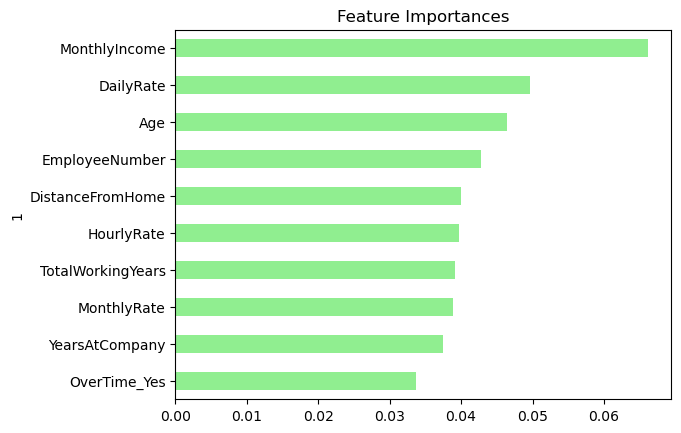

In [20]:
#Plot Importances
importances_df = pd.DataFrame(sorted(zip(rfc.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
top_ten_importances = importances_sorted.tail(10)
top_ten_importances.plot(kind='barh', color='lightgreen', title= 'Feature Importances', legend=False)

# Support Vector Model

In [21]:
#Try Support Vector Model
from sklearn.svm import SVC

In [22]:
#Define model, train and predict
svc = SVC()
svc.fit(X_train_scaled, y_train)
prediction_svc = svc.predict(X_test_scaled)

In [23]:
#Classification report
print(classification_report(y_test, prediction_svc))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       249
           1       0.65      0.23      0.34        47

    accuracy                           0.86       296
   macro avg       0.76      0.60      0.63       296
weighted avg       0.84      0.86      0.83       296



In [24]:
#Confusion Matirix
print(confusion_matrix(y_test, prediction_svc))

[[243   6]
 [ 36  11]]


# Logistic Regression Model

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [26]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [27]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

In [28]:
# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8783783783783784


In [29]:
#Confusion Matirix
print(confusion_matrix(y_test, y_pred))

[[236  13]
 [ 23  24]]


# Conclusions

The Neural Network Model alongside a Hyperban Tuner gave 84% accuracy. Both the Random Forest and Support Vector Models gave 86% accuracy while the Logistic Regression Model gave the best results at 87.8% accuracy. This is likely since our data has mostly non-linear relationships, which is where random forest models become more effective.